In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
def NMC_ocp_PeymanMPM(sto):
    """
    Nickel Managanese Cobalt Oxide (NMC) Open Circuit Potential (OCP) as a
    function of the stochiometry. The fit is taken from Peyman MPM.
    References
    ----------
    Peyman MPM manuscript (to be submitted)
    Parameters
    ----------
    sto : :class:`pybamm.Symbol`
       Stochiometry of material (li-fraction)
    """

    u_eq = (
        4.3452
        - 1.6518 * sto
        + 1.6225 * (sto ** 2)
        - 2.0843 * (sto ** 3)
        + 3.5146 * (sto ** 4)
        - 2.2166 * (sto ** 5)
        - 0.5623e-4 * np.exp(109.451 * sto - 100.006)
    )

    return u_eq

In [12]:
def graphite_ocp_PeymanMPM(sto):
    """
    Graphite Open Circuit Potential (OCP) as a function of the
    stochiometry. The fit is taken from Peyman MPM [1].
    References
    ----------
    .. [1] Peyman Mohtat et al, MPM (to be submitted)
    """

    u_eq = (
        0.063
        + 0.8 * np.exp(-75 * (sto + 0.001))
        - 0.0120 * np.tanh((sto - 0.127) / 0.016)
        - 0.0118 * np.tanh((sto - 0.155) / 0.016)
        - 0.0035 * np.tanh((sto - 0.220) / 0.020)
        - 0.0095 * np.tanh((sto - 0.190) / 0.013)
        - 0.0145 * np.tanh((sto - 0.490) / 0.020)
        - 0.0800 * np.tanh((sto - 1.030) / 0.055)
    )

    return u_eq

In [28]:
Cn = 5.97 # Ah
Cp = 5.97 # Ah

nLi = 0.19 # moles

F = 96500 # C mol-1

In [29]:
y100 = np.arange(0.1, 0.4, 100)

In [30]:
sto_vec = np.linspace(0, 1, 100)

In [31]:
Up = NMC_ocp_PeymanMPM(sto_vec)
Un = graphite_ocp_PeymanMPM(sto_vec)

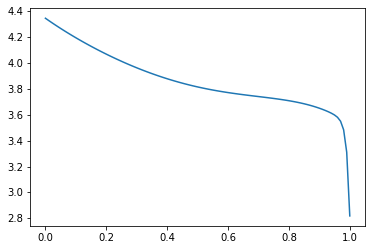

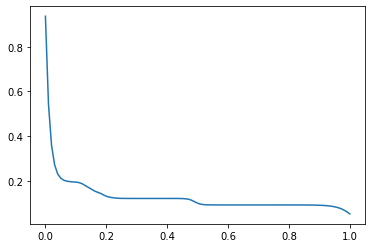

In [32]:
plt.figure()
plt.plot(sto_vec, Up)
plt.figure()
plt.plot(sto_vec, Un)

In [35]:
y100_vec = np.linspace(0, 0.1, 10)

x100 = ( nLi * F / 3600 - y100_vec * Cp ) / Cn
Vmax = NMC_ocp_PeymanMPM(y100_vec) - graphite_ocp_PeymanMPM(x100)

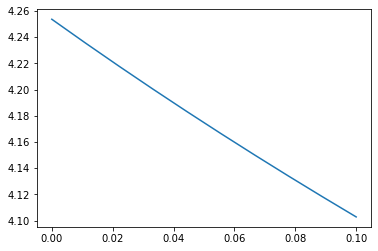

In [36]:
plt.figure()
plt.plot(y100_vec, Vmax)